In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
orbit = pd.read_excel("Sample File.xlsx")

In [3]:
orbit.head()

,id,time_created,time_updated,agency,external_id,title,url,price,bedrooms,bathrooms,garages,parkings,latitude,longitude,area,status,offering,erf_size,floor_size,property_type
0,188,2019-05-17 19:11:08.691784+00:00,2020-02-12 21:42:34.466622+00:00,dogon_group_properties,RL7861,2 Bedroom Apartment For Sale in Fresnaye,https://www.dogongroup.com/results/residential...,5995000.0,2.0,2.0,NaN,2.0,-33.924799,18.385675,Fresnaye,active,sale,NaN,129.0,apartment
1,211,2019-05-17 19:11:08.802299+00:00,2020-02-12 21:42:26.722360+00:00,dogon_group_properties,RL7723,3 Bedroom Apartment For Sale in Bantry Bay,https://www.dogongroup.com/results/residential...,6490000.0,3.0,3.0,NaN,1.0,-33.928305,18.379390,Bantry Bay,active,sale,NaN,140.0,apartment
2,217,2019-05-17 19:11:08.831019+00:00,2020-02-12 21:42:08.399121+00:00,dogon_group_properties,RL7639,5 Bedroom House For Sale in Constantia,https://www.dogongroup.com/results/residential...,7995000.0,5.0,5.0,2.0,NaN,-34.015040,18.439780,Constantia,active,sale,1375.0,NaN,house
3,271,2019-05-17 19:11:09.096526+00:00,2020-02-12 21:42:03.292978+00:00,dogon_group_properties,RL7263,7 Bedroom House For Sale in Fresnaye,https://www.dogongroup.com/results/residential...,32950000.0,7.0,5.0,2.0,6.0,-33.929890,18.383340,Fresnaye,active,sale,636.0,NaN,house
4,276,2019-05-17 19:11:09.123885+00:00,2020-02-12 21:42:46.566199+00:00,dogon_group_properties,RL7214,5 Bedroom House For Sale in Constantia,https://www.dogongroup.com/results/residential...,25900000.0,5.0,5.0,3.0,8.0,-34.029720,18.435170,Constantia,active,sale,4000.0,800.0,house


Dropping the columns 'id', 'time_created','time_updated','external_id','url','latitude' and 'longitude' from the dataset,
as these variables do not provide information significant in modeling

In [4]:
orbit.drop(['id','time_created','time_updated','external_id','url'],axis=1,inplace=True)

In [5]:
orbit.drop(['latitude','longitude'],axis=1,inplace=True)

In [6]:
orbit.status.value_counts()

active    1042
Name: status, dtype: int64

Here I have observed that the variable 'status' has only one value throughout the dataset i.e. 'active', 
hence I have can drop this variable as it is not providing us significant information

In [7]:
orbit.drop(['status'],axis=1,inplace=True)

In [8]:
orbit.shape

(1042, 12)

In [9]:
orbit.columns

Index(['agency', 'title', 'price', 'bedrooms', 'bathrooms', 'garages',
       'parkings', 'area', 'offering', 'erf_size', 'floor_size',
       'property_type'],
      dtype='object')

In [10]:
orbit.isnull().sum()

agency             0
title              0
price            131
bedrooms          30
bathrooms         40
garages          360
parkings         518
area               0
offering         160
erf_size         363
floor_size       463
property_type      0
dtype: int64

In [44]:
Orbit.drop(['id','time_created','time_updated','external_id','url','status','latitude','longitude'],axis=1,inplace=True)

# PERCENTAGE OF MISSING VALUES BY FEATURE

,Total,Percent
parkings,518,0.497121
floor_size,463,0.444338
erf_size,363,0.348369
garages,360,0.345489
offering,160,0.153551


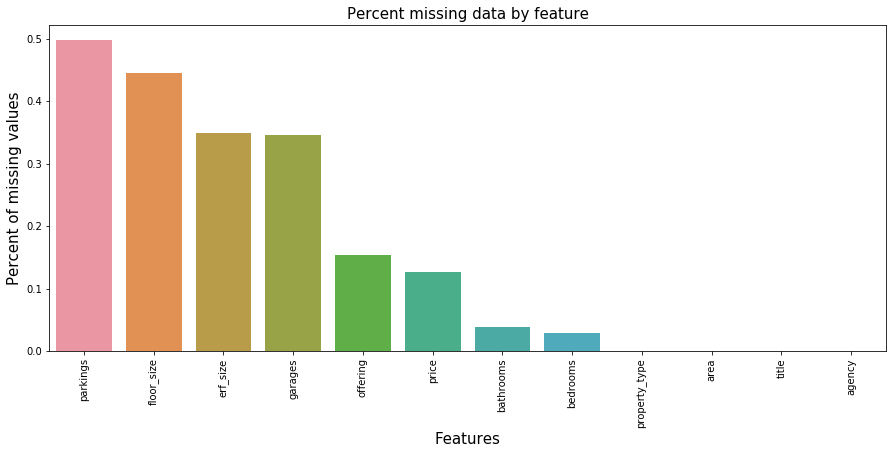

In [45]:
total = Orbit.isnull().sum().sort_values(ascending=False)
percent = (Orbit.isnull().sum()/Orbit.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

# DATA PREPROCESSING

Here I can see that the variables 'bedrooms','bathrooms','garages','parkings','offering','erf_size','floor_size'
have missing values and the target variable 'price' also has missing values.
Hence I need to take care of this by filling the missing values of the independent features and the target variable.

# PROPERTY_TYPE

In [11]:
orbit.property_type.value_counts()

house              704
apartment          243
vacant_land         60
['house']           28
['vacant_land']      3
[None]               2
['apartment']        2
Name: property_type, dtype: int64

Here we need to convert the values of the variable 'property_type' like,
'['house']' to 'house', 
'['vacant_land']' to 'vacant_land', 
'['apartment']' to 'apartment' 
and also take care of '[None]' values in the property_type variable.

In [13]:
orbit['property_type'] = orbit['property_type'].replace("['house']",'house')

In [14]:
orbit['property_type'] = orbit['property_type'].replace("['apartment']",'apartment')

In [15]:
orbit['property_type'] = orbit['property_type'].replace("['vacant_land']",'vacant_land')

In [16]:
orbit.property_type.value_counts()

house          732
apartment      245
vacant_land     63
[None]           2
Name: property_type, dtype: int64

Observing the rows whcih have '[None]' value in the 'property_type' variable

In [17]:
orbit[orbit['property_type']=='[None]']

,agency,title,price,bedrooms,bathrooms,garages,parkings,area,offering,erf_size,floor_size,property_type
874,rawson,"4 Bedroom cluster to rent in Constantia, Cape ...",33000.0,4.0,4.0,2.0,NaN,Constantia,rent,0.0,NaN,[None]
1028,rawson,"1 Bedroom cottage to rent in Constantia, Cape ...",9000.0,1.0,1.0,NaN,NaN,Constantia,rent,0.0,NaN,[None]


In [18]:
orbit[orbit['area']=='Constantia']['property_type'].value_counts()

house          488
vacant_land     54
apartment        3
[None]           2
Name: property_type, dtype: int64

In [19]:
orbit[orbit['agency']=='rawson']['property_type'].value_counts()

house          43
apartment       7
vacant_land     3
[None]          2
Name: property_type, dtype: int64

After making the above observation I filled the two rows which have value '[None]' in the property_type column 
with 'house' as the  value for the'agency' variable for these rows is 'rawson' and
the mode for the variable 'property_type' for the agency 'rawson' is 'house' and 
also mode for the 'property_type' variable for the area 'Constantia' is also 'house'

In [20]:
orbit['property_type'] = orbit['property_type'].replace("[None]",'house')

In [21]:
orbit['property_type'].value_counts()

house          734
apartment      245
vacant_land     63
Name: property_type, dtype: int64

In [22]:
orbit['property_type'].isnull().sum()

0

# ERF_SIZE

In [23]:
erf_empty = orbit[orbit['erf_size'].isnull()]

In [24]:
ese_index = erf_empty.index

In [25]:
erf_empty_index = []
for i in ese_index:
    erf_empty_index.append(i)

In [26]:
len(erf_empty_index)

363

'erf_empty_index' is a list of length 363 and contains the indexes of rows 
where thw value for the 'erf_size' variable is 'NaN'

In [27]:
orbit.loc[erf_empty_index,['title','erf_size']].head()

,title,erf_size
0,2 Bedroom Apartment For Sale in Fresnaye,NaN
1,3 Bedroom Apartment For Sale in Bantry Bay,NaN
7,673m² Vacant Land For Sale in Bantry Bay,NaN
12,3 Bedroom Apartment For Sale in Fresnaye,NaN
13,2 Bedroom Apartment For Sale in Fresnaye,NaN


As we can see above we can extract the value of 'erf_size' from the 'title' variable,
using the code written below.

In [28]:
import re
digit = []
num = []
for i in erf_empty_index:
    str = orbit.iloc[i,1]
    if 'm²' in str:
        ans = str.split("m²",1)
        ans[0] = ans[0].replace(",","")
        ans[0] = int(ans[0])
        digit.append(ans[0])
        num.append(i)
        

'num' is the list of indexes where the variable 'title' contains the substring "m²" in the 'title' variable,
as this will help me fill the NaN values for the rows of the 'erf_size' variable, whose indexes aree stored in 'erf_empty_index'

'digit' contains the values of 'erf_size' extracted from the 'title' variable, whcih can be filled in the 'erf_size' variable
which have 'NaN' values

In [29]:
digit

[673,
 1500,
 1573,
 8443,
 1344,
 1344,
 673,
 1087,
 1087,
 1344,
 585,
 1811,
 1344,
 1222,
 17587,
 4014,
 4003,
 1344,
 1600,
 1980,
 2448,
 1600,
 1006,
 1052,
 1600,
 2000,
 1600,
 1730,
 2000,
 2268,
 270,
 8189,
 712,
 2000,
 1700,
 1006,
 1774,
 270]

In [30]:
len(num)

38

In [31]:
len(digit)

38

In [32]:
orbit_index = orbit.index
import re
digit_orbit = []
num_orbit = []
for i in orbit_index:
    str = orbit.iloc[i,1]
    if 'm²' in str:
        anso = str.split("m²",1)
        anso[0] = anso[0].replace(",","")
        anso[0] = int(anso[0])
        digit_orbit.append(anso[0])
        num_orbit.append(i)
        

In [33]:
len(digit_orbit)

48

In [34]:
len(num_orbit)

48

In [35]:
orbit.loc[num_orbit,['title','erf_size']]

,title,erf_size
7,673m² Vacant Land For Sale in Bantry Bay,NaN
55,619 m² residential vacant land for sale in Ban...,619.0
72,1298 m² residential vacant land for sale in Fr...,1298.0
103,1573 m² residential vacant land for sale in Co...,1573.0
116,"1,500m² Vacant Land For Sale in Constantia",NaN
117,"1,573m² Vacant Land For Sale in Constantia",NaN
133,"8,443m² Vacant Land For Sale in Constantia",NaN
155,"1,344m² Vacant Land For Sale in Constantia",NaN
159,"1,344m² Vacant Land For Sale in Constantia",NaN
179,673m² Vacant Land For Sale in Bantry Bay,NaN


In [36]:
orbit.loc[num,['title','erf_size']]

,title,erf_size
7,673m² Vacant Land For Sale in Bantry Bay,NaN
116,"1,500m² Vacant Land For Sale in Constantia",NaN
117,"1,573m² Vacant Land For Sale in Constantia",NaN
133,"8,443m² Vacant Land For Sale in Constantia",NaN
155,"1,344m² Vacant Land For Sale in Constantia",NaN
159,"1,344m² Vacant Land For Sale in Constantia",NaN
179,673m² Vacant Land For Sale in Bantry Bay,NaN
188,"1,087m² Vacant Land For Sale in Constantia",NaN
207,"1,087m² Vacant Land For Sale in Constantia",NaN
210,"1,344m² Vacant Land For Sale in Constantia",NaN


Hence I only need to fill the rows where the variable 'erf_size' is 'NaN' 
these index of these rows has been stored in 'num' 

Here you can observe that the 'erf_size' values stored in 'digit'
are being filled using the indexes stored in 'num'

In [37]:
for i in range(len(digit)):
    orbit.loc[num[i],['erf_size']] = orbit.loc[num[i],['erf_size']].replace(np.nan, digit[i])

In [38]:
orbit.loc[num,['title','erf_size']]

,title,erf_size
7,673m² Vacant Land For Sale in Bantry Bay,673.0
116,"1,500m² Vacant Land For Sale in Constantia",1500.0
117,"1,573m² Vacant Land For Sale in Constantia",1573.0
133,"8,443m² Vacant Land For Sale in Constantia",8443.0
155,"1,344m² Vacant Land For Sale in Constantia",1344.0
159,"1,344m² Vacant Land For Sale in Constantia",1344.0
179,673m² Vacant Land For Sale in Bantry Bay,673.0
188,"1,087m² Vacant Land For Sale in Constantia",1087.0
207,"1,087m² Vacant Land For Sale in Constantia",1087.0
210,"1,344m² Vacant Land For Sale in Constantia",1344.0


# Predicting Missing Values Using Imputers From sklearn.preprocessing

# KNEAREST NEIGHBORS IMPUTER

In [403]:
orbit.columns

Index(['agency', 'title', 'price', 'bedrooms', 'bathrooms', 'garages',
       'parkings', 'area', 'offering', 'erf_size', 'floor_size',
       'property_type'],
      dtype='object')

In [406]:
orbit.head()

,agency,title,price,bedrooms,bathrooms,garages,parkings,area,offering,erf_size,floor_size,property_type
0,dogon_group_properties,2 Bedroom Apartment For Sale in Fresnaye,5995000.0,2.0,2.0,NaN,2.0,Fresnaye,sale,NaN,129.0,apartment
1,dogon_group_properties,3 Bedroom Apartment For Sale in Bantry Bay,6490000.0,3.0,3.0,NaN,1.0,Bantry Bay,sale,NaN,140.0,apartment
2,dogon_group_properties,5 Bedroom House For Sale in Constantia,7995000.0,5.0,5.0,2.0,NaN,Constantia,sale,1375.0,NaN,house
3,dogon_group_properties,7 Bedroom House For Sale in Fresnaye,32950000.0,7.0,5.0,2.0,6.0,Fresnaye,sale,636.0,NaN,house
4,dogon_group_properties,5 Bedroom House For Sale in Constantia,25900000.0,5.0,5.0,3.0,8.0,Constantia,sale,4000.0,800.0,house


Here I used the KNNImputer to fill the missing values in the variables 'price', "garages","parkings","erf_size","floor_size"
by predicting the values using the KNNImputer library.
We go through a range of values from 1 to 20, for the parameter 'n_neighbors' in the KNNImputer
as we want to find which value of 'n_neighbors' gives the maximum value
of correlation between the target variable 'price' and the feature 'floor_size'.
The reason I have selected  the variable 'floor_size' to calculate the correlation with
the target variable 'price' is that, before imputing the missing values
the target variable 'price' had the highest corrleation with
the independent variable 'floor_size' which was 0.5319914806523912.
Now I am finding the maximum correaltion value between the
target variable 'price' and the variable 'floor_size'
after the missing values are imputed using the KNNImputer,
for different values of the parameter 'n_neighbors' and then
compare it with 0.5319914806523912, whcih is the correlation
for the original dataset whcih consists of missing values.

In [367]:
list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [409]:
#KNN IMPUTER

orbit20 = orbit
from missingpy import KNNImputer

data_information = []
correlation_list = []

for i in list:

    data = orbit20.iloc[:,[2,5,6,9,10]].values
    imputer = KNNImputer(n_neighbors=i,weights='uniform')
    data[:,:]=imputer.fit_transform(data[:,:])
    data_information.append(data)
    
    
for data in data_information:
    data_new = pd.DataFrame(data=data, columns=["price", "garages","parkings","erf_size","floor_size"])
    corr = (data_new['price'].corr(data_new['floor_size']))
    correlation_list.append(corr)
    

C:\Users\Lenovo\Anaconda3\lib\site-packages\missingpy\knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
C:\Users\Lenovo\Anaconda3\lib\site-packages\missingpy\knnimpute.py:282: UserWarning: There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\mi

In [410]:
max_corr = max(correlation_list)

In [411]:
max_corr

0.4233518730063556

In [412]:
correlation_list

[0.30210207477733914,
 0.37549721793915275,
 0.392773618705637,
 0.39836676069087773,
 0.42178330727221486,
 0.4233518730063556,
 0.42140911695708255,
 0.4177183661201356,
 0.41738385139190504,
 0.4144103206775005,
 0.4130177434909629,
 0.40987146988067225,
 0.4133261893612021,
 0.4085250654648763,
 0.4048498325276257,
 0.4039288974008184,
 0.4001260967601665,
 0.39523123194695253,
 0.3906290586316774,
 0.3876250704962517]

Text(0, 0.5, 'Correaltion of price with floor_size')

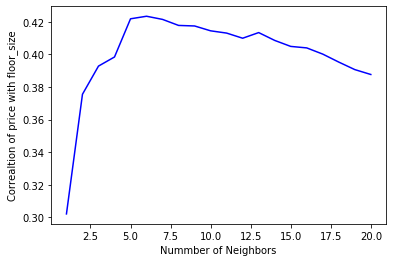

In [414]:
no_neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(no_neighbors, correlation_list, 'b')
plt.xlabel("Nummber of Neighbors")
plt.ylabel("Correaltion of price with floor_size")

Here we observe that the maximum correlation between the target variable
'price' and the independent variable 'floor_size' is 0.4233518730063556, when the value for 'n_neighbors' 
is 6. This value is less than the value of correlation for the orignal dataset,
hence we move on to another Imputer to fill the missing values as after the missing values 
were filled using the KNNImputer the correlation decreased whcih is not desirable.

In [567]:
data_new.head()

,price,garages,parkings,erf_size,floor_size
0,5995000.0,0.828221,2.0,1006.660497,129.000000
1,6490000.0,1.000000,1.0,211.000000,140.000000
2,7995000.0,2.000000,2.0,1375.000000,167.928473
3,32950000.0,2.000000,6.0,636.000000,557.177556
4,25900000.0,3.000000,8.0,4000.000000,800.000000


In [416]:
data_new.isnull().sum()

price         0
garages       0
parkings      0
erf_size      0
floor_size    0
dtype: int64

The above values indicate that the missing values were filled successfully using 
the KNNImputer

Now we move on to another Imputer, Iterative Imputer

# ITERATIVE IMPUTER

In [447]:
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

x=orbit.iloc[:,[2,5,6,9,10]].values
    
imputer = IterativeImputer(missing_values=np.nan,max_iter =10,random_state=0,verbose=0,initial_strategy='mean')
x[:,:]=imputer.fit_transform(x[:,:])
data_ = pd.DataFrame(data=x, columns=["price", "garages","parkings","erf_size","floor_size"])
cor = (data_['price'].corr(data_['floor_size']))

print("correlation of price and floor_size is:",cor)

correlation of price and floor_size is: 0.6703992976511615


In [ ]:
data_.head()

In [445]:
data_.isnull().sum()

price         0
garages       0
parkings      0
erf_size      0
floor_size    0
dtype: int64

In [446]:
orbit.columns

Index(['agency', 'title', 'price', 'bedrooms', 'bathrooms', 'garages',
       'parkings', 'area', 'offering', 'erf_size', 'floor_size',
       'property_type'],
      dtype='object')

In [443]:
data_['price'].corr(data_['floor_size'])

0.6703992976511615

In [444]:
orbit['price'].corr(orbit['floor_size'])

0.5319914806523912

Here we observe that the correlation between the target variable 'price' and
the independent variable 'floor_size' is 0.6703992976511615 after the imputation of
missing values using IterativeImpueter. This value is more than the correlation value for the 
orignal dataset. Hence we allow the imputation of the missing values
using IterativeImputer into the orignal dataset.

In [431]:
data_.shape

(1042, 5)

In [432]:
data_.isnull().sum()

price         0
garages       0
parkings      0
erf_size      0
floor_size    0
dtype: int64

# OFFERING 

In [56]:
orbit['offering'].isnull().sum()

160

In [57]:
orbit[orbit['offering'].isnull()]

,agency,title,price,bedrooms,bathrooms,garages,parkings,area,offering,erf_size,floor_size,property_type
48,pam_golding,5 bedroom house for sale in Bantry Bay,65000000.0,5.0,6.0,2.0,4.0,Bantry Bay,NaN,1486.0,NaN,house
49,pam_golding,3 bedroom house for sale in Bantry Bay,22995000.0,3.0,4.0,2.0,2.0,Bantry Bay,NaN,708.0,350.0,house
50,pam_golding,3 bedroom townhouse for sale in Fresnaye,16950000.0,3.0,3.0,2.0,2.0,Fresnaye,NaN,301.0,350.0,house
51,pam_golding,2 bedroom house for sale in Bakoven,16000000.0,2.0,2.0,1.0,NaN,Bakoven,NaN,211.0,NaN,house
52,pam_golding,5 bedroom house for sale in Constantia Upper,14995000.0,5.0,4.0,2.0,NaN,Constantia,NaN,1401.0,NaN,house
53,pam_golding,4 bedroom house for sale in Constantia Upper,16785000.0,4.0,NaN,4.0,4.0,Constantia,NaN,1953.0,NaN,house
54,pam_golding,5 bedroom house for sale in Fresnaye,15500000.0,5.0,3.0,3.0,NaN,Fresnaye,NaN,476.0,NaN,house
55,pam_golding,619 m² residential vacant land for sale in Ban...,20000000.0,0.0,0.0,NaN,NaN,Bantry Bay,NaN,619.0,NaN,vacant_land
56,pam_golding,3 bedroom apartment for sale in Fresnaye,20500000.0,3.0,3.0,NaN,3.0,Fresnaye,NaN,NaN,317.0,apartment
57,pam_golding,3 bedroom house for sale in Fresnaye,16999000.0,3.0,NaN,3.0,NaN,Fresnaye,NaN,381.0,480.0,house


As you can observe from the dataframe above, we can extract the type of 'offering' from the 'title' variable to fill the 'NaN' values in the variable 'offering'. Here I have created 4 lists buy_index, rent_index, sale_index and none_index to stores the indexes of the rows which have the substring 'buy', 'rent', 'sale' in the 'title' variable.

In [58]:
offering_index = orbit[orbit['offering'].isnull()].index

import re
buy_index = []
rent_index = []
sale_index = []
none_index = []

for i in offering_index:
    
    str = orbit.iloc[i,1]
    
    if 'sale' in str:
        sale_index.append(i)
        
    elif 'rent' in str:
        rent_index.append(i)
            
    elif 'buy' in str:
        buy_index.append(i)
    
    else:
        none_index.append(i)
        

In [59]:
len(sale_index)

160

In [60]:
len(buy_index)

0

In [61]:
len(rent_index)

0

In [62]:
len(none_index)

0

In [63]:
sale_index

[48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 250,
 252,
 254,
 256,
 314,
 332,
 339,
 340,
 344,
 345,
 346,
 349,
 351,
 356,
 370,
 383,
 384,
 389,
 394,
 411,
 412,
 413,
 422,
 423,
 424,
 425,
 427,
 432,
 438,
 439,
 440,
 444,
 448,
 449,
 455,
 456,
 457,
 458,
 480,
 494,
 499,
 502,
 503,
 506,
 510,
 511,
 513,
 514,
 517,
 522,
 524,
 561,
 562,
 563,
 564,
 594,
 595,
 614,
 628,
 631,
 643,
 644,
 674,
 684,
 685,
 811,
 812,
 825,
 826,
 827,
 828,
 836,
 840,
 848,
 849,
 857,
 866,
 886,
 896,
 899,
 906,
 907,
 908,
 912,
 913,
 917,
 919,
 921,
 922,
 923,
 924,
 931,
 943,
 946,
 951,
 955,
 962,
 976,
 983,
 984,
 985,
 1000,
 1010,
 1029]

In [64]:
for i in range(len(sale_index)):
    
    orbit.loc[sale_index[i],['offering']] = orbit.loc[sale_index[i],['offering']].replace(np.nan, 'sale')

The length of the 'sale_index' list is 160 and also the total no of rows having 'NaN' value in 'offering' is 160.
Hence I have filled all these 'NaN' values with 'sale' at their respective indexes.
Now there aren't any missing values in the 'offering variable.

In [65]:
orbit['offering'].isnull().sum()

0

In [66]:
orbit['offering'].value_counts()

sale    790
rent    132
buy     120
Name: offering, dtype: int64

# VACANT LAND

Filling the missing values for the variables 'bedrooms','bathrooms','garages','floor_size' and 'parkings'
where 'property_type' is 'vacant_land'. For the variable 'property_type' having value 'vacant_land',
the values for the variables 'bedrooms', 'bathrooms', 'garages', 'floor_size' and 'parkings'
should be 0.

In [67]:
vacant = orbit[orbit['property_type'] == "vacant_land"]

In [68]:
ind = vacant.index

In [69]:
len(ind)

63

In [70]:
vacant_index = []

for i in ind:
    vacant_index.append(i)
    

In [71]:
len(vacant_index)

63

vacant_index consists of all the indexes of the dataframe where the 'property_type' id 'vacant_land'

In [72]:
orbit.columns

Index(['agency', 'title', 'price', 'bedrooms', 'bathrooms', 'garages',
       'parkings', 'area', 'offering', 'erf_size', 'floor_size',
       'property_type'],
      dtype='object')

In [73]:
orbit[orbit['property_type']=='vacant_land']

,agency,title,price,bedrooms,bathrooms,garages,parkings,area,offering,erf_size,floor_size,property_type
7,dogon_group_properties,673m² Vacant Land For Sale in Bantry Bay,20000000.0,NaN,NaN,NaN,NaN,Bantry Bay,sale,673.0,NaN,vacant_land
55,pam_golding,619 m² residential vacant land for sale in Ban...,20000000.0,0.0,0.0,NaN,NaN,Bantry Bay,sale,619.0,NaN,vacant_land
72,pam_golding,1298 m² residential vacant land for sale in Fr...,24950000.0,0.0,0.0,NaN,NaN,Fresnaye,sale,1298.0,NaN,vacant_land
103,pam_golding,1573 m² residential vacant land for sale in Co...,3750000.0,0.0,0.0,NaN,NaN,Constantia,sale,1573.0,NaN,vacant_land
116,blue_chip,"1,500m² Vacant Land For Sale in Constantia",3750000.0,NaN,NaN,NaN,NaN,Constantia,sale,1500.0,NaN,vacant_land
117,blue_chip,"1,573m² Vacant Land For Sale in Constantia",3750000.0,NaN,NaN,NaN,NaN,Constantia,sale,1573.0,NaN,vacant_land
133,chas_everitt,"8,443m² Vacant Land For Sale in Constantia",11950000.0,NaN,NaN,NaN,NaN,Constantia,sale,8443.0,NaN,vacant_land
155,hamiltons,"1,344m² Vacant Land For Sale in Constantia",5500000.0,NaN,NaN,NaN,NaN,Constantia,sale,1344.0,NaN,vacant_land
159,upton_real_estate,"1,344m² Vacant Land For Sale in Constantia",6650000.0,NaN,NaN,NaN,NaN,Constantia,sale,1344.0,NaN,vacant_land
179,seeff,673m² Vacant Land For Sale in Bantry Bay,20000000.0,NaN,NaN,NaN,NaN,Bantry Bay,sale,673.0,NaN,vacant_land


In [74]:
len(orbit[orbit['property_type']=='vacant_land'])

63

By observing the 'title' feature of above dataframe which consists of 'property_type' as 'vacant_land',
some of the properties are 'Freestanding' i.e. the no of 'bedrooms','bathrooms','garages','parkings',"floor_size"
cannot be zero for these properties. Hence these properties are let go and rest of the properties
have been imputed with value 0 for the variables 'bedrooms','bathrooms','garages','parkings',"floor_size".

In [75]:
import re
count = 0
for i in vacant_index:
    str = orbit.iloc[i,1]
    str = str.lower()
    
    if 'bedroom' in str:
        pass
    
    else:
        count += 1
        orbit.loc[i,['bedrooms','bathrooms','garages','parkings',"floor_size"]] = orbit.loc[i,['bedrooms','bathrooms','garages','parkings','floor_size']].replace(np.nan, 0)
        

In [76]:
len(vacant_index)

63

In [77]:
count

51

In [78]:
orbit.isnull().sum()

agency             0
title              0
price            131
bedrooms           4
bathrooms         14
garages          309
parkings         467
area               0
offering           0
erf_size         325
floor_size       412
property_type      0
dtype: int64

# BATHROOMS

In [79]:
orbit[orbit['bathrooms'].isnull()]

,agency,title,price,bedrooms,bathrooms,garages,parkings,area,offering,erf_size,floor_size,property_type
53,pam_golding,4 bedroom house for sale in Constantia Upper,16785000.0,4.0,NaN,4.0,4.0,Constantia,sale,1953.0,NaN,house
57,pam_golding,3 bedroom house for sale in Fresnaye,16999000.0,3.0,NaN,3.0,NaN,Fresnaye,sale,381.0,480.0,house
349,pam_golding,5 bedroom house for sale in Constantia Upper,14950000.0,5.0,NaN,2.0,NaN,Constantia,sale,1351.0,NaN,house
513,pam_golding,4 bedroom house for sale in Constantia (Cape T...,5495000.0,4.0,NaN,2.0,2.0,Constantia,sale,977.0,NaN,house
561,pam_golding,4 bedroom house for sale in Bantry Bay,33000000.0,4.0,NaN,2.0,7.0,Bantry Bay,sale,700.0,NaN,house
563,pam_golding,4 bedroom house for sale in Constantia (Cape T...,7995000.0,4.0,NaN,3.0,2.0,Constantia,sale,2183.0,NaN,house
628,pam_golding,4 bedroom house for sale in Constantia Upper,9900000.0,4.0,NaN,2.0,NaN,Constantia,sale,2000.0,300.0,house
648,engel_and_volkers,Luxurious 3 Bed Apt with Spectacular Sea Views,58900.0,3.0,NaN,NaN,NaN,Bakoven,rent,NaN,310.0,apartment
651,engel_and_volkers,Exclusive 5 bedroom house with stunning views,17950000.0,5.0,NaN,2.0,NaN,Bakoven,buy,831.0,400.0,house
652,engel_and_volkers,Magnificent 5 ens bed home with glorious views,30000.0,5.0,NaN,2.0,NaN,Bantry Bay,rent,798.0,600.0,house


In [80]:
len(orbit[orbit['bathrooms'].isnull()])

14

In [81]:
orbit[orbit['property_type']=='house']['bathrooms'].value_counts()

4.0     194
3.0     165
5.0     139
2.0     100
6.0      62
7.0      29
8.0       9
10.0      8
1.0       6
9.0       6
11.0      2
12.0      2
Name: bathrooms, dtype: int64

Now while filling the variable 'bathrooms', there are 14 NaN values.
Hence I have decided to fill the values on a case by case basis.
I have decided to fill the 'NaN' values based on their 'property_type'.
So for filling the 'bathrooms' variable which has 'property_type' as 'house',
I have filled these values with the mode for the 'bathrooms' variable.
Similarly I have done the same for the other 'property_type' 'apartment'.

In [82]:
house_bath_mode = orbit[orbit['property_type']=='house']['bathrooms'].mode()

In [83]:
house_bath_mode

0    4.0
dtype: float64

In [84]:
for i in house_bath_mode:
    house_bathrooms_mode = i

In [85]:
house_bathrooms_mode

4.0

In [86]:
orbit[orbit['property_type']=='apartment']['bathrooms'].value_counts()

2.0    93
1.0    55
3.0    55
4.0    30
5.0     5
7.0     3
6.0     2
Name: bathrooms, dtype: int64

In [87]:
apart_bath_mode = orbit[orbit['property_type']=='apartment']['bathrooms'].mode()

In [88]:
apart_bath_mode

0    2.0
dtype: float64

In [89]:
for i in apart_bath_mode:
    apart_bathrooms_mode = i

In [90]:
apart_bathrooms_mode

2.0

In [91]:
#Filling with mode values

In [92]:
bath_house = orbit[orbit['bathrooms'].isnull() & (orbit['property_type'] == "house")]

In [93]:
len(bath_house)

12

In [94]:
house_index = bath_house.index

In [95]:
bathroom_house_index = []
for i in house_index:
    bathroom_house_index.append(i)
    

bathroom_house_index consists of indexes which have 'property_type' as 'house'
and has 'NaN' value for the 'bathrooms' variable.

In [96]:
bathroom_house_index

[53, 57, 349, 513, 561, 563, 628, 651, 652, 868, 898, 988]

In [97]:
orbit.loc[bathroom_house_index,['bathrooms']] = orbit.loc[bathroom_house_index,['bathrooms']].replace(np.nan, house_bathrooms_mode)

In [98]:
bath_apartment = orbit[(orbit['property_type'] == "apartment") & (orbit['bathrooms'].isnull())]

In [99]:
len(bath_apartment)

2

In [100]:
apart_index = bath_apartment.index

In [101]:
bathroom_apartment_index = []
for i in apart_index:
    bathroom_apartment_index.append(i)
    

bathroom_apartment_index consists of indexes which have 'property_type' as 'apartment'
and has 'NaN' value for the 'bathrooms' variable

In [102]:
bathroom_apartment_index

[648, 655]

In [103]:
orbit.loc[bathroom_apartment_index,['bathrooms']] = orbit.loc[bathroom_apartment_index,['bathrooms']].replace(np.nan, apart_bathrooms_mode)

In [104]:
orbit['bathrooms'].isnull().sum()

0

Hence we have filled all the 'NaN' values for the 'bathrooms' variable

# BEDROOMS

In [105]:
orbit['bedrooms'].isnull().sum()

4

Now while filling the variable 'bedrooms', there are 4 NaN values.
Hence I have decided to fill the values on a case by case basis.
I have decided to fill the 'NaN' values based on their 'property_type'.
So for filling the 'bedrooms' variable which has 'property_type' as 'house',
I have filled these values with the mode for the 'bedrooms' variable.
Similarly I have done the same for the other 'property_type' 'apartment'.

In [106]:
orbit[orbit['bedrooms'].isnull()]

,agency,title,price,bedrooms,bathrooms,garages,parkings,area,offering,erf_size,floor_size,property_type
605,rawson,"Apartment for sale in Fresnaye, Cape Town",1800000.0,NaN,1.0,NaN,NaN,Fresnaye,sale,0.0,51.0,apartment
842,rawson,"Apartment for sale in Fresnaye, Cape Town",1800000.0,NaN,1.0,NaN,NaN,Fresnaye,sale,0.0,51.0,apartment
957,rawson,"Apartment for sale in Fresnaye, Cape Town",1800000.0,NaN,1.0,NaN,NaN,Fresnaye,sale,0.0,51.0,apartment
988,engel_and_volkers,Large family house with ocean views,37000.0,NaN,4.0,1.0,NaN,Fresnaye,rent,NaN,600.0,house


In [107]:
apart_bed_mode = orbit[orbit['property_type']=='apartment']['bedrooms'].mode()

In [108]:
orbit[orbit['property_type']=='apartment']['bedrooms'].value_counts()

3.0    102
2.0     90
1.0     29
4.0      8
0.0      6
5.0      4
6.0      3
Name: bedrooms, dtype: int64

In [109]:
apart_bed_mode

0    3.0
dtype: float64

In [110]:
type(apart_bed_mode)

pandas.core.series.Series

In [111]:
for i in apart_bed_mode:
    apart_bedrooms_mode = i

In [112]:
apart_bedrooms_mode

3.0

In [113]:
type(apart_bed_mode)

pandas.core.series.Series

In [114]:
house_bed_mode = orbit[orbit['property_type']=='house']['bedrooms'].mode()

In [115]:
house_bed_mode

0    4.0
dtype: float64

In [116]:
for i in house_bed_mode:
    house_bedrooms_mode = i

In [117]:
house_bedrooms_mode

4.0

In [118]:
orbit[orbit['property_type']=='house']['bedrooms'].value_counts()

4.0     279
5.0     181
3.0     130
6.0      61
7.0      28
2.0      27
8.0       9
10.0      6
9.0       6
1.0       3
11.0      2
12.0      1
Name: bedrooms, dtype: int64

In [119]:
bed_apart = orbit[orbit['bedrooms'].isnull() & (orbit['property_type'] == "apartment")]

In [120]:
bed_house = orbit[orbit['bedrooms'].isnull() & (orbit['property_type'] == "house")]

In [121]:
len(bed_apart)

3

In [122]:
len(bed_house)

1

In [123]:
bed_apart_index = bed_apart.index

In [124]:
bedroom_apartment_index = []
for i in bed_apart_index:
    bedroom_apartment_index.append(i)
    

In [125]:
bedroom_apartment_index

[605, 842, 957]

bedroom_apart_index consists of indexes which have 'property_type' as 'apartment'
and has 'NaN' value for the 'bedrooms' variable.

In [126]:
bed_house_index = bed_house.index

In [127]:
bedroom_house_index = []
for i in bed_house_index:
    bedroom_house_index.append(i)
    

In [128]:
bedroom_house_index

[988]

bedroom_house_index consists of the index which has 'property_type' as 'house'
and has 'NaN' value for the 'bathrooms' variable.

In [129]:
orbit.loc[bedroom_apartment_index,['bedrooms']] = orbit.loc[bedroom_apartment_index,['bedrooms']].replace(np.nan, apart_bedrooms_mode)

In [130]:
orbit.loc[bedroom_house_index,['bedrooms']] = orbit.loc[bedroom_house_index,['bedrooms']].replace(np.nan, house_bedrooms_mode)

In [131]:
orbit['bedrooms'].isnull().sum()

0

In [132]:
orbit.isnull().sum()

agency             0
title              0
price            131
bedrooms           0
bathrooms          0
garages          309
parkings         467
area               0
offering           0
erf_size         325
floor_size       412
property_type      0
dtype: int64

# PRICE

Initially i thought of fillig the missing values in the 'price' feature for the 'property_type' - 'vacant_land' 
for the different values in the 'area' feature. The 'area' feature consists of 4 unique values
which are 'Bantry Bay', 'Constantine' , 'Bakoven' and 'Fresnaye' and the feature 'property_type' 
consists of 3 unique values, whcih are 'vacant_land', 'apartment' and 'house'.

In [143]:
orbit[orbit['price'].isnull()]

,agency,title,price,bedrooms,bathrooms,garages,parkings,area,offering,erf_size,floor_size,property_type
270,sothebys_realty,"17,587m² Vacant Land For Sale in Constantia",NaN,0.0,0.0,0.0,0.0,Constantia,sale,17587.0,0.0,vacant_land
319,sothebys_realty,8 Bedroom House For Sale in Constantia,NaN,8.0,10.0,4.0,NaN,Constantia,sale,8319.0,NaN,house
657,engel_and_volkers,Luxury 5 bed home with private pool & views,NaN,5.0,5.0,2.0,NaN,Fresnaye,rent,NaN,NaN,house
699,remax,3 Bedroom Apartment / Flat To Rent in Fresnaye,NaN,3.0,2.0,NaN,NaN,Fresnaye,rent,NaN,155.0,apartment
700,remax,4 Bedroom House For Sale in Constantia,NaN,4.0,4.0,NaN,4.0,Constantia,buy,1750.0,NaN,house
701,remax,5 Bedroom House To Rent in Bantry Bay,NaN,5.0,6.0,NaN,2.0,Bantry Bay,rent,NaN,600.0,house
702,remax,3 Bedroom Apartment / Flat For Sale in Bantry Bay,NaN,3.0,5.0,NaN,NaN,Bantry Bay,buy,NaN,380.0,apartment
703,remax,3 Bedroom Apartment / Flat To Rent in Bantry Bay,NaN,3.0,2.0,NaN,2.0,Bantry Bay,rent,NaN,141.0,apartment
704,remax,2 Bedroom Apartment / Flat To Rent in Fresnaye,NaN,2.0,1.0,NaN,NaN,Fresnaye,rent,NaN,92.0,apartment
705,remax,2 Bedroom House For Sale in Bantry Bay,NaN,2.0,2.0,NaN,NaN,Bantry Bay,buy,NaN,99.0,house


In [144]:
len(orbit[orbit['price'].isnull()])

131

In [88]:
orbit[(orbit['price'].isnull()) & (orbit['property_type']=='vacant_land')]

,agency,title,price,bedrooms,bathrooms,garages,parkings,latitude,longitude,area,status,offering,erf_size,floor_size,property_type
270,sothebys_realty,"17,587m² Vacant Land For Sale in Constantia",NaN,0.0,0.0,0.0,0.0,NaN,NaN,Constantia,active,sale,NaN,0.0,vacant_land
969,knight_frank,712m² Vacant Land For Sale in Bantry Bay,NaN,0.0,0.0,0.0,0.0,-33.93071,18.38045,Bantry Bay,active,sale,NaN,0.0,vacant_land


In [ ]:
# PROPERTY_TYPE 'VACANT_LAND'

In [85]:
len(orbit[(orbit['price'].isnull()) & (orbit['property_type']=='vacant_land')])

2

In [ ]:
#Mean values

In [100]:
vl_bb_mean = orbit[(orbit['property_type']=='vacant_land') & (orbit['area']=='Bantry Bay')]['price'].mean()

In [101]:
vl_c_mean = orbit[(orbit['property_type']=='vacant_land') & (orbit['area']=='Constantia')]['price'].mean()

In [ ]:
# respective dataframes

In [120]:
vl_bb = orbit[(orbit['property_type']=='vacant_land') & (orbit['area']=='Bantry Bay') & (orbit['price'].isnull())]

In [121]:
vl_c = orbit[(orbit['property_type']=='vacant_land') & (orbit['area']=='Constantia') & (orbit['price'].isnull())]

In [ ]:
#indexes

In [122]:
vl_bb_index = vl_bb.index

In [123]:
vl_c_index = vl_c.index

vl_bb_mean is the mean value of 'price' where the 'property_type' is 'vacant_land' and the 'area' is 'Bantry Bay', 
vl_bb is the respecctive dataframe and price_vl_bb_index has a list of indexes of the vl_bb dataframe

vl_c_mean is the  mean value of 'price' where the 'property_type' is 'vacant_land' and the 'area' is 'Constantia'
vl_c is the respective dataframe and price_vl_c_index has a list of indexes of the vl_bb dataframe


In [124]:
price_vl_bb_index = []
for i in vl_bb_index:
    price_vl_bb_index.append(i)
    

In [128]:
orbit.loc[price_vl_bb_index,['price']] = orbit.loc[price_vl_bb_index,['price']].replace(np.nan, vl_bb_mean)

I filled the 'price' variable having the indexes stored in 'price_vl_bb_index' with the mean value 'vl_bb_mean'

In [126]:
len(price_vl_bb_index)

1

In [125]:
price_vl_c_index = []
for i in vl_c_index:
    price_vl_c_index.append(i)
    

In [127]:
len(price_vl_c_index)

1

In [129]:
orbit.loc[price_vl_c_index,['price']] = orbit.loc[price_vl_c_index,['price']].replace(np.nan, vl_c_mean)

I filled the 'price' variable having the indexes stored in 'price_vl_c_index' with the mean value 'vl_c_mean'

In [130]:
orbit['price'].isnull().sum()

129

In [ ]:
# PROPERTY_TYPE 'HOUSE'

In [80]:
len(orbit[(orbit['price'].isnull()) & (orbit['property_type']=='house')])

82

In [ ]:
#mean values

In [102]:
ho_c_mean = orbit[(orbit['property_type']=='house') & (orbit['area']=='Constantia')]['price'].mean()

In [103]:
ho_f_mean = orbit[(orbit['property_type']=='house') & (orbit['area']=='Fresnaye')]['price'].mean()

In [104]:
ho_bb_mean = orbit[(orbit['property_type']=='house') & (orbit['area']=='Bantry Bay')]['price'].mean()

In [105]:
ho_bv_mean = orbit[(orbit['property_type']=='house') & (orbit['area']=='Bakoven')]['price'].mean()

In [ ]:
#respective dataframes

In [132]:
ho_c = orbit[(orbit['property_type']=='house') & (orbit['area']=='Constantia') & (orbit['price'].isnull())]

In [133]:
ho_f = orbit[(orbit['property_type']=='house') & (orbit['area']=='Fresnaye') & (orbit['price'].isnull())]

In [134]:
ho_bb = orbit[(orbit['property_type']=='house') & (orbit['area']=='Bantry Bay') & (orbit['price'].isnull())]

In [135]:
ho_bv = orbit[(orbit['property_type']=='house') & (orbit['area']=='Bakoven') & (orbit['price'].isnull())]

ho_c_mean is the mean value of 'price' where the 'property_type' is 'house' and the 'area' is 'Constantia', 
ho_c is the respective dataframe and price_ho_c_index has a list of indexes of the ho_c dataframe

ho_f_mean is the mean value of 'price' where the 'property_type' is 'house' and the 'area' is 'Fresnaye', 
ho_f is the respective dataframe and price_ho_f_index has a list of indexes of the ho_f dataframe

ho_bb_mean is the mean value of 'price' where the 'property_type' is 'house' and the 'area' is 'Bantry Bay', 
ho_bb is the respective dataframe and price_ho_bb_index has a list of indexes of the ho_bb dataframe

ho_bv_mean is the mean value of 'price' where the 'property_type' is 'house' and the 'area' is 'Bakoven', 
ho_bv is the respective dataframe and price_ho_bv_index has a list of indexes of the ho_bv dataframe

In [136]:
ho_c_index = ho_c.index
ho_f_index = ho_f.index
ho_bb_index = ho_bb.index
ho_bv_index = ho_bv.index

price_ho_c_index = []
for i in ho_c_index:
    price_ho_c_index.append(i)
    
price_ho_f_index = []
for i in ho_f_index:
    price_ho_f_index.append(i)
    
price_ho_bb_index = []
for i in ho_bb_index:
    price_ho_bb_index.append(i)
    
price_ho_bv_index = []
for i in ho_bv_index:
    price_ho_bv_index.append(i)
    


I filled the 'price' variable having the indexes stored in 'price_ho_c_index', 'price_ho_f_index', 'price_ho_bb_index', 'price_ho_bv_index'with the mean values 'ho_c_mean', 'ho_f_mean','ho_bb_mean' and 'ho_bv_mean' for 
their respective dataframes

In [137]:
orbit.loc[price_ho_c_index,['price']] = orbit.loc[price_ho_c_index,['price']].replace(np.nan, ho_c_mean)
orbit.loc[price_ho_f_index,['price']] = orbit.loc[price_ho_f_index,['price']].replace(np.nan, ho_f_mean)
orbit.loc[price_ho_bb_index,['price']] = orbit.loc[price_ho_bb_index,['price']].replace(np.nan, ho_bb_mean)
orbit.loc[price_ho_bv_index,['price']] = orbit.loc[price_ho_bv_index,['price']].replace(np.nan, ho_bv_mean)


In [138]:
orbit['price'].isnull().sum()

47

In [ ]:
#PROPERTY_TYPE 'APARTMENT'

In [81]:
len(orbit[(orbit['price'].isnull()) & (orbit['property_type']=='apartment')])

47

In [ ]:
#mean values

In [140]:
ap_c_mean = orbit[(orbit['property_type']=='apartment') & (orbit['area']=='Constantia')]['price'].mean()

In [141]:
ap_f_mean = orbit[(orbit['property_type']=='apartment') & (orbit['area']=='Fresnaye')]['price'].mean()

In [142]:
ap_bb_mean = orbit[(orbit['property_type']=='apartment') & (orbit['area']=='Bantry Bay')]['price'].mean()

In [143]:
ap_bv_mean = orbit[(orbit['property_type']=='apartment') & (orbit['area']=='Bakoven')]['price'].mean()

In [144]:
#respective dataframes

In [145]:
ap_c = orbit[(orbit['property_type']=='apartment') & (orbit['area']=='Constantia') & (orbit['price'].isnull())]
ap_f = orbit[(orbit['property_type']=='apartment') & (orbit['area']=='Fresnaye') & (orbit['price'].isnull())]
ap_bb = orbit[(orbit['property_type']=='apartment') & (orbit['area']=='Bantry Bay') & (orbit['price'].isnull())]
ap_bv = orbit[(orbit['property_type']=='apartment') & (orbit['area']=='Bakoven') & (orbit['price'].isnull())]


In [146]:
ap_c_index = ap_c.index
ap_f_index = ap_f.index
ap_bb_index = ap_bb.index
ap_bv_index = ap_bv.index

price_ap_c_index = []
for i in ap_c_index:
    price_ap_c_index.append(i)
    
price_ap_f_index = []
for i in ap_f_index:
    price_ap_f_index.append(i)
    
price_ap_bb_index = []
for i in ap_bb_index:
    price_ap_bb_index.append(i)

price_ap_bv_index = []
for i in ap_bv_index:
    price_ap_bv_index.append(i)



ap_c_mean is the mean value of 'price' where the 'property_type' is 'apartment' and the 'area' is 'Constantia', 
ap_c is the respective dataframe and price_ap_c_index has a list of indexes of the ap_c dataframe

ap_f_mean is the mean value of 'price' where the 'property_type' is 'apartment' and the 'area' is 'Fresnaye', 
ap_f is the respective dataframe and price_ap_f_index has a list of indexes of the ap_f dataframe

ap_bb_mean is the mean value of 'price' where the 'property_type' is 'apartment' and the 'area' is 'Bantry Bay', 
ap_bb is the respective dataframe and price_ap_bb_index has a list of indexes of the ap_bb dataframe

ap_bv_mean is the mean value of 'price' where the 'property_type' is 'apartment' and the 'area' is 'Bakoven', 
ap_bv is the respective dataframe and price_ap_bv_index has a list of indexes of the ap_bv dataframe

In [147]:
orbit.loc[price_ap_c_index,['price']] = orbit.loc[price_ap_c_index,['price']].replace(np.nan, ap_c_mean)
orbit.loc[price_ap_f_index,['price']] = orbit.loc[price_ap_f_index,['price']].replace(np.nan, ap_f_mean)
orbit.loc[price_ap_bb_index,['price']] = orbit.loc[price_ap_bb_index,['price']].replace(np.nan, ap_bb_mean)
orbit.loc[price_ap_bv_index,['price']] = orbit.loc[price_ap_bv_index,['price']].replace(np.nan, ap_bv_mean)


I filled the 'price' variable having the indexes stored in 'price_ap_c_index', 'price_ap_f_index',
'price_ap_bb_index', 'price_ap_bv_index'with the mean values 'ap_c_mean', 'ap_f_mean','ap_bb_mean'
and 'ap_bv_mean' for their respective dataframes.

In this manner i could have imputed the mean values for the missing values in the dataframe
but this way of filling the missing values using the mean creates a bias in the variable,
which we do not want . Hence i went ahead with IterativeImputer to fill the missing values

# CONVERTING CATEGORICAL VARIABLES TO NUMERICAL VARIABLES

In [488]:
orbit.head()

,agency,title,bedrooms,bathrooms,area,offering,property_type,price,garages,erf_size,floor_size,parkings
0,dogon_group_properties,2 Bedroom Apartment For Sale in Fresnaye,2.0,2.0,Fresnaye,sale,apartment,5995000.0,1.361435,737.614343,129.000000,2.000000
1,dogon_group_properties,3 Bedroom Apartment For Sale in Bantry Bay,3.0,3.0,Bantry Bay,sale,apartment,6490000.0,1.159220,775.427340,140.000000,1.000000
2,dogon_group_properties,5 Bedroom House For Sale in Constantia,5.0,5.0,Constantia,sale,house,7995000.0,2.000000,1375.000000,311.425293,2.735935
3,dogon_group_properties,7 Bedroom House For Sale in Fresnaye,7.0,5.0,Fresnaye,sale,house,32950000.0,2.000000,636.000000,379.491337,6.000000
4,dogon_group_properties,5 Bedroom House For Sale in Constantia,5.0,5.0,Constantia,sale,house,25900000.0,3.000000,4000.000000,800.000000,8.000000


The features 'area', 'offering' and 'property_type' are converted to numerical values
by mapping the values of
'area' : {:0,:1,:2,:3}
'offering': {:0, :1, :2}
'property_type': {:0, :1, :2}

In [518]:
orbit.head()

,bedrooms,bathrooms,area,offering,property_type,price,garages,erf_size,floor_size,parkings
0,2.0,2.0,1,0,1,5995000.0,1.361435,737.614343,129.000000,2.000000
1,3.0,3.0,2,0,1,6490000.0,1.159220,775.427340,140.000000,1.000000
2,5.0,5.0,0,0,0,7995000.0,2.000000,1375.000000,311.425293,2.735935
3,7.0,5.0,1,0,0,32950000.0,2.000000,636.000000,379.491337,6.000000
4,5.0,5.0,0,0,0,25900000.0,3.000000,4000.000000,800.000000,8.000000


In [490]:
orbit.isnull().sum()

agency           0
title            0
bedrooms         0
bathrooms        0
area             0
offering         0
property_type    0
price            0
garages          0
erf_size         0
floor_size       0
parkings         0
dtype: int64

# DATA VISUALIZATION

,Total,Percent
parkings,518,0.497121
floor_size,463,0.444338
erf_size,363,0.348369
garages,360,0.345489
offering,160,0.153551


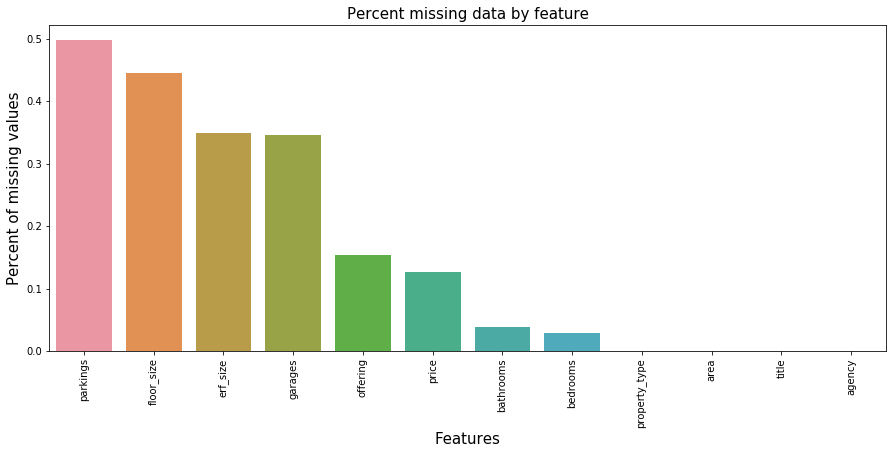

In [161]:
total = Orbit.isnull().sum().sort_values(ascending=False)
percent = (Orbit.isnull().sum()/Orbit.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

# AGENCY

In [145]:
orbit['agency'].value_counts()

pam_golding               160
seeff                     125
remax                     125
jawitz                     94
sothebys_realty            84
dogon_group_properties     72
rawson                     55
chas_everitt               49
knight_frank               45
greef_christies            43
live_real_estate           40
blue_chip                  37
tyson_properties           30
hamiltons                  26
engel_and_volkers          23
the_agency_group           10
upton_real_estate           6
currin_properties           3
celsa_properties            3
durr_estates                2
realtor_of_excellence       2
acutts                      1
coastal_property_group      1
talana_foot                 1
harcourts                   1
meridian_realty             1
broll                       1
property_time               1
alexo                       1
Name: agency, dtype: int64

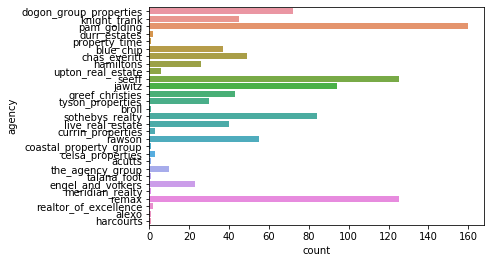

In [144]:
sns.countplot(y=orbit['agency'])

# BEDROOMS

In [465]:
orbit['bedrooms'].value_counts()

4.0     293
3.0     238
5.0     188
2.0     117
6.0      65
0.0      57
1.0      32
7.0      28
8.0       9
10.0      6
9.0       6
11.0      2
12.0      1
Name: bedrooms, dtype: int64

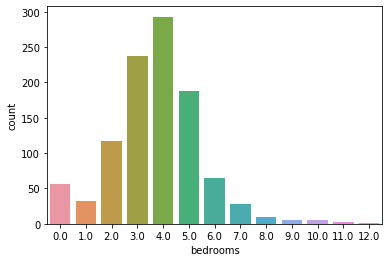

In [467]:
sns.countplot(x=orbit['bedrooms'])

# AREA

In [157]:
orbit['area'].value_counts()

Constantia    547
Fresnaye      236
Bantry Bay    227
Bakoven        32
Name: area, dtype: int64

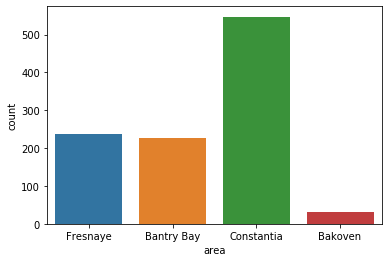

In [158]:
sns.countplot(x=orbit['area'])

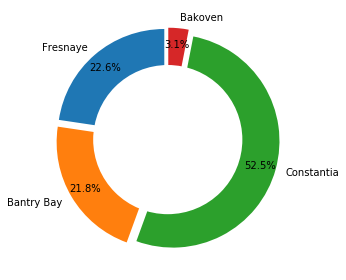

In [160]:
# Pie chart
labels = ['Fresnaye', 'Bantry Bay', 'Constantia','Bakoven']
sizes = [236, 227, 547, 32]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05,0.05)
 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()


In [168]:
area_color_table = pd.crosstab(index=orbit["area"], 
                          columns=orbit["offering"])

area_color_table

offering,buy,rent,sale
area,,,
Bakoven,14,5,13
Bantry Bay,43,38,146
Constantia,27,51,469
Fresnaye,36,38,162


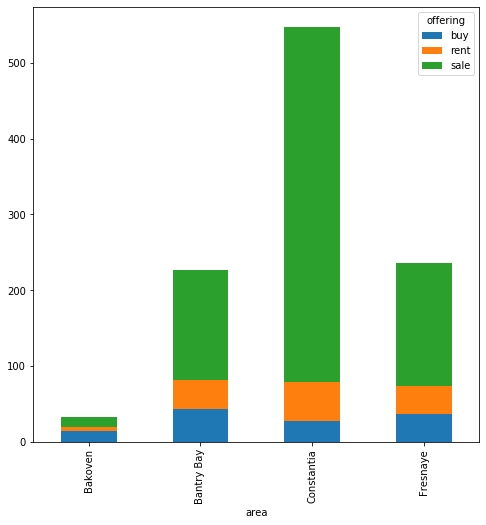

In [169]:
area_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [200]:
offering_color_table = pd.crosstab(index=orbit["property_type"], 
                          columns=orbit["area"])

offering_color_table

area,Bakoven,Bantry Bay,Constantia,Fresnaye
property_type,,,,
apartment,6,145,3,91
house,26,76,490,142
vacant_land,0,6,54,3


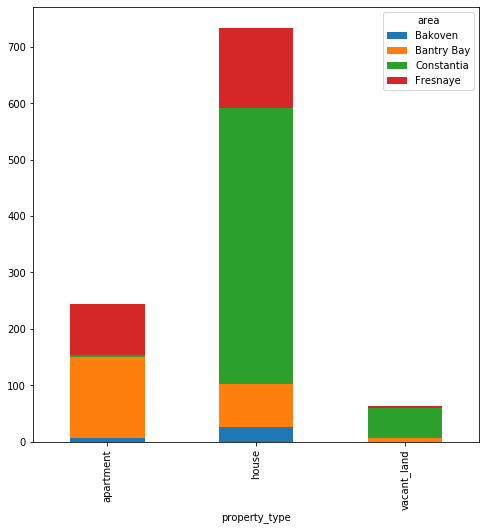

In [201]:
offering_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

# BATHROOMS

In [468]:
orbit['bathrooms'].value_counts()

4.0     239
3.0     226
2.0     197
5.0     145
6.0      64
1.0      61
0.0      51
7.0      32
8.0       9
10.0      8
9.0       6
11.0      2
12.0      2
Name: bathrooms, dtype: int64

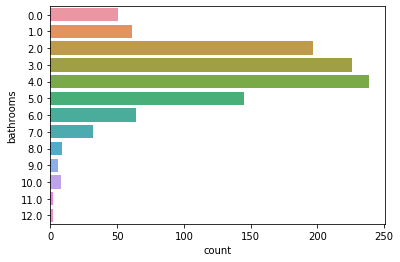

In [470]:
sns.countplot(y=orbit['bathrooms'])

# AREA

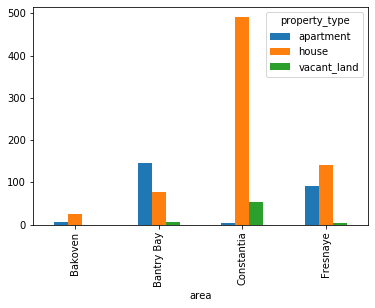

In [198]:
(orbit
 .groupby(['area', 'property_type'])
 .size()
 .unstack()
 .plot.bar()
)

# PROPERTY TYPE

In [471]:
orbit.property_type.value_counts()

house          734
apartment      245
vacant_land     63
Name: property_type, dtype: int64

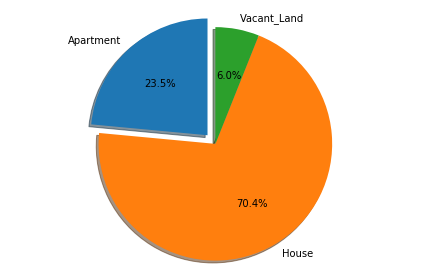

In [472]:
# Pie chart
labels = ['Apartment', 'House', 'Vacant_Land']
sizes = [245, 734, 63]
# only "explode" the 2nd slice (i.e. 'Rent')
explode = (0.1, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [473]:
property_type_color_table = pd.crosstab(index=orbit["area"], 
                          columns=orbit["property_type"])

property_type_color_table

property_type,apartment,house,vacant_land
area,,,
Bakoven,6,26,0
Bantry Bay,145,76,6
Constantia,3,490,54
Fresnaye,91,142,3


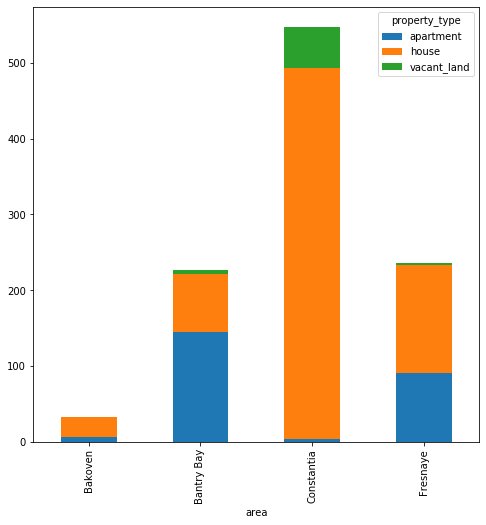

In [474]:
property_type_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

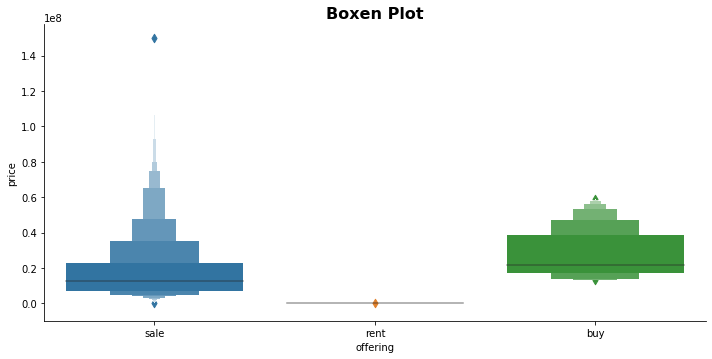

In [189]:
sns.catplot(x='offering', y='price', data=orbit, kind='boxen', aspect=2)
plt.title('Boxen Plot', weight='bold', fontsize=16)
plt.show()

# PRICE

In [475]:
orbit['price'].describe()

count    1.042000e+03
mean     1.570626e+07
std      1.673860e+07
min     -1.251616e+07
25%      5.900000e+06
50%      1.150000e+07
75%      1.799875e+07
max      1.500000e+08
Name: price, dtype: float64

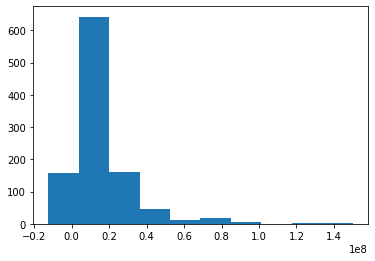

In [476]:
plt.hist(orbit['price'])
plt.show()

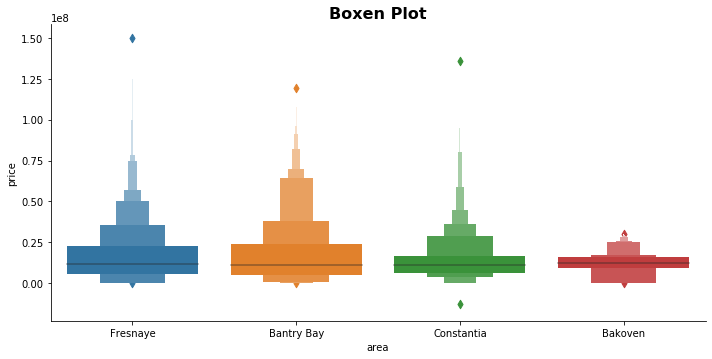

In [477]:
sns.catplot(x='area', y='price', data=orbit, kind='boxen', aspect=2)
plt.title('Boxen Plot', weight='bold', fontsize=16)
plt.show()

# MODELING

IN THE END DO WE NEED TO CONVERT THE CATEORICAL VARIABLES INTO NUMERICAL ONES
DROP 'TITLE' FEATURE IN THE END
CATEGORICAL VARIABLES ARE
AGENCY
AREA
OFFERING
PROPERTY_TYPE

AFTER CONVERTING THE CATEGORICAL VARIABLES INTO NUMERIC
SPLIT THE DATA INTO TRAINING AND TEST DATA

In [492]:
orbit.head()

,agency,title,bedrooms,bathrooms,area,offering,property_type,price,garages,erf_size,floor_size,parkings
0,dogon_group_properties,2 Bedroom Apartment For Sale in Fresnaye,2.0,2.0,1,0,1,5995000.0,1.361435,737.614343,129.000000,2.000000
1,dogon_group_properties,3 Bedroom Apartment For Sale in Bantry Bay,3.0,3.0,2,0,1,6490000.0,1.159220,775.427340,140.000000,1.000000
2,dogon_group_properties,5 Bedroom House For Sale in Constantia,5.0,5.0,0,0,0,7995000.0,2.000000,1375.000000,311.425293,2.735935
3,dogon_group_properties,7 Bedroom House For Sale in Fresnaye,7.0,5.0,1,0,0,32950000.0,2.000000,636.000000,379.491337,6.000000
4,dogon_group_properties,5 Bedroom House For Sale in Constantia,5.0,5.0,0,0,0,25900000.0,3.000000,4000.000000,800.000000,8.000000


In [ ]:
#Drop the columns 'agency','title' from the dataframe

In [493]:
orbit.drop(['agency','title'],axis=1,inplace=True)

In [494]:
orbit.shape

(1042, 10)

In [495]:
orbit.head()

,bedrooms,bathrooms,area,offering,property_type,price,garages,erf_size,floor_size,parkings
0,2.0,2.0,1,0,1,5995000.0,1.361435,737.614343,129.000000,2.000000
1,3.0,3.0,2,0,1,6490000.0,1.159220,775.427340,140.000000,1.000000
2,5.0,5.0,0,0,0,7995000.0,2.000000,1375.000000,311.425293,2.735935
3,7.0,5.0,1,0,0,32950000.0,2.000000,636.000000,379.491337,6.000000
4,5.0,5.0,0,0,0,25900000.0,3.000000,4000.000000,800.000000,8.000000


# BOXPLOT TO FIND OUT THE OUTLIERS IN THE DATASET

The way you prepare a dataset with outliers for modelling is different from the one without outliers 
as you will see later on with scaling. Here, you can see outliers in the target variable 'price' from the above figure. While price outliers would not be a concern because it is the target feature,the presence of outliers in predictors, in this case there aren't any, would affect the model’s performance. 
Detecting outliers and choosing the appropriate scaling method to minimize their effect would ultimately improve performance.

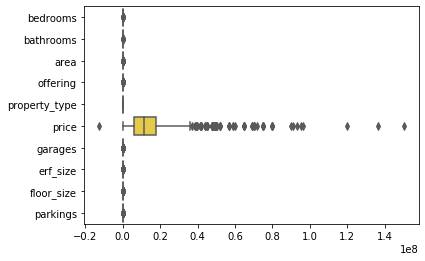

In [514]:
sns.boxplot(data=orbit, orient='h', palette="Set2")

# CORREALTION MATRIX

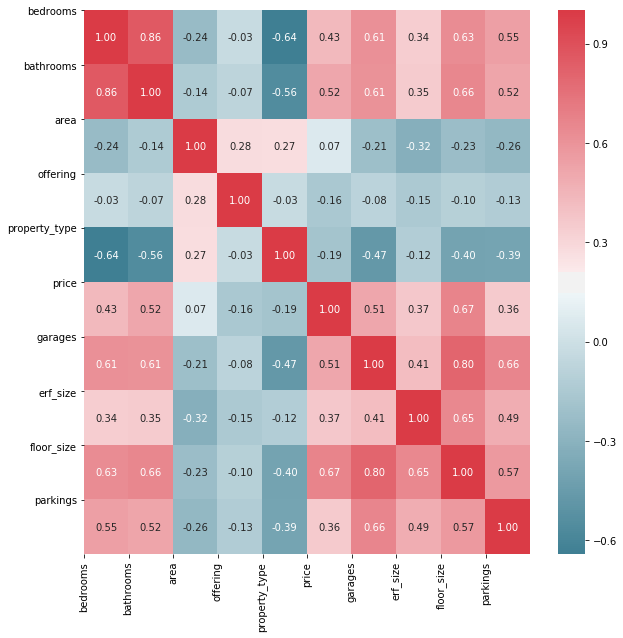

In [517]:
corr = orbit.corr()
    #Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [516]:
corr_matrix = orbit.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
floor_size       0.670399
bathrooms        0.518321
garages          0.513668
bedrooms         0.432674
erf_size         0.365938
parkings         0.355133
area             0.066915
offering        -0.159269
property_type   -0.185786
Name: price, dtype: float64

From the correlation matrix, we can see that there is varying extent to which the independent variables are correlated with
the target. Lower correlation means weak linear relationship but there may be a strong non-linear relationship so, 
we can’t pass any judgement at this level, let the algorithm work for us.

# TRAIN TEST SPLIT

In [529]:
X=orbit.drop(['price'],axis=1)
y = orbit['price']

In [498]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(orbit, test_size=0.3)

train_y= train[['price']]
train_x = train[['bedrooms' , 'bathrooms', 'area', 'offering','property_type','garages','erf_size','floor_size','parkings']]

test_y= test[['price']]
test_x = test[['bedrooms' , 'bathrooms', 'area', 'offering','property_type','garages','erf_size','floor_size','parkings']]

Splitting the data into training and testing dataset, with a 70:30 split

In [499]:
train_y.shape

(729, 1)

In [506]:
train_y.head()

,price
904,3700000.0
927,80000000.0
509,8900000.0
913,12950000.0
518,25980000.0


In [500]:
test_y.shape

(313, 1)

In [507]:
test_y.head()

,price
188,2.995000e+06
910,1.100000e+05
245,1.575000e+07
758,1.186763e+07
1036,2.900000e+07


In [501]:
train_x.shape

(729, 9)

In [509]:
train_x.head()

,bedrooms,bathrooms,area,offering,property_type,garages,erf_size,floor_size,parkings
904,3.0,3.0,0,0,0,1.315509,736.000000,104.000000,2.052192
927,6.0,6.0,0,0,0,4.000000,10738.000000,1622.276818,6.000000
509,4.0,3.0,0,0,0,2.000000,2100.000000,370.645737,2.000000
913,4.0,4.0,0,0,0,2.000000,1363.000000,341.723987,2.715181
518,3.0,4.0,3,0,1,2.000000,835.552599,229.000000,2.684712


In [502]:
test_x.shape

(313, 9)

In [508]:
test_x.head()

,bedrooms,bathrooms,area,offering,property_type,garages,erf_size,floor_size,parkings
188,0.0,0.0,0,0,2,0.000000,1087.000000,0.0,0.000000
910,4.0,5.0,0,0,0,4.000000,4006.000000,1240.0,4.641575
245,3.0,3.0,1,0,1,2.000000,948.777285,216.0,2.710492
758,3.0,3.0,2,2,0,1.741621,650.000000,245.0,2.343045
1036,5.0,3.0,2,0,0,2.000000,2392.553159,605.0,2.804779


# FEATURE SCALING

Here we try different scaling methods to find the best suitable one

In [521]:
import warnings  
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [522]:
orbit.columns

Index(['bedrooms', 'bathrooms', 'area', 'offering', 'property_type', 'price',
       'garages', 'erf_size', 'floor_size', 'parkings'],
      dtype='object')

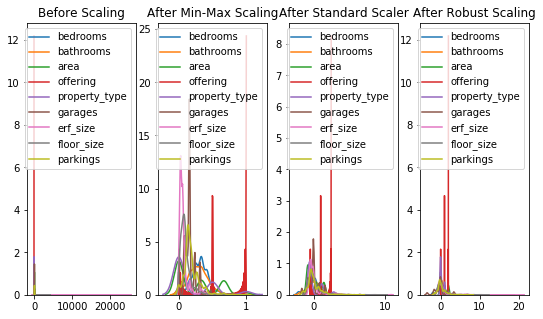

In [524]:
x = pd.DataFrame({
    'bedrooms': orbit.bedrooms,
    'bathrooms': orbit.bathrooms,
    'area': orbit.area,
    'offering' : orbit.offering,
    'property_type': orbit.property_type,
    'garages' : orbit.garages,
    'erf_size': orbit.erf_size,
    'floor_size': orbit.floor_size,
    'parkings': orbit.parkings
})

scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['bedrooms', 'bathrooms', 'area', 'offering', 'property_type', 'garages','erf_size', 'floor_size', 'parkings'])

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(x)
scaled_df = pd.DataFrame(scaled_df, columns=['bedrooms', 'bathrooms', 'area', 'offering', 'property_type', 'garages','erf_size', 'floor_size', 'parkings'])

    
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['bedrooms', 'bathrooms', 'area', 'offering', 'property_type', 'garages','erf_size', 'floor_size', 'parkings'])


fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['bedrooms'], ax=ax1)
sns.kdeplot(x['bathrooms'], ax=ax1)
sns.kdeplot(x['area'], ax=ax1)
sns.kdeplot(x['offering'], ax=ax1)
sns.kdeplot(x['property_type'], ax=ax1)
sns.kdeplot(x['garages'], ax=ax1)
sns.kdeplot(x['erf_size'], ax=ax1)
sns.kdeplot(x['floor_size'], ax=ax1)
sns.kdeplot(x['parkings'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['bedrooms'], ax=ax2)
sns.kdeplot(minmax_scaled_df['bathrooms'], ax=ax2)
sns.kdeplot(minmax_scaled_df['area'], ax=ax2)
sns.kdeplot(minmax_scaled_df['offering'], ax=ax2)
sns.kdeplot(minmax_scaled_df['property_type'], ax=ax2)
sns.kdeplot(minmax_scaled_df['garages'], ax=ax2)
sns.kdeplot(minmax_scaled_df['erf_size'], ax=ax2)
sns.kdeplot(minmax_scaled_df['floor_size'], ax=ax2)
sns.kdeplot(minmax_scaled_df['parkings'], ax=ax2)

ax3.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['bedrooms'], ax=ax3)
sns.kdeplot(scaled_df['bathrooms'], ax=ax3)
sns.kdeplot(scaled_df['area'], ax=ax3)
sns.kdeplot(scaled_df['offering'], ax=ax3)
sns.kdeplot(scaled_df['property_type'], ax=ax3)
sns.kdeplot(scaled_df['garages'], ax=ax3)
sns.kdeplot(scaled_df['erf_size'], ax=ax3)
sns.kdeplot(scaled_df['floor_size'], ax=ax3)
sns.kdeplot(scaled_df['parkings'], ax=ax3)

ax4.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['bedrooms'], ax=ax4)
sns.kdeplot(robust_scaled_df['bathrooms'], ax=ax4)
sns.kdeplot(robust_scaled_df['area'], ax=ax4)
sns.kdeplot(robust_scaled_df['offering'], ax=ax4)
sns.kdeplot(robust_scaled_df['property_type'], ax=ax4)
sns.kdeplot(robust_scaled_df['garages'], ax=ax4)
sns.kdeplot(robust_scaled_df['erf_size'], ax=ax4)
sns.kdeplot(robust_scaled_df['floor_size'], ax=ax4)
sns.kdeplot(robust_scaled_df['parkings'], ax=ax4)
plt.show()

# Based on the above result we will consider Robust Scaling for disance related algorithms 

In [528]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Select features and Find the best hyper-parameters for the regressors

In [535]:
import statsmodels.api as sm

In [543]:
# Linear Regression
X1 = sm.add_constant(train_x)
ols = sm.OLS(train_y,X1)
lr = ols.fit()

selected_features = ['bedrooms', 'bathrooms', 'area', 'offering', 'property_type', 'garages',
       'erf_size', 'floor_size', 'parkings']
pmax = 1
while (len(selected_features)>0):
    p= []
    X_1 = X[selected_features]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = selected_features)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        selected_features.remove(feature_with_p_max)
    else:
        break  
        
print('The selected features are :', selected_features)

The selected features are : ['bathrooms', 'area', 'offering', 'property_type', 'erf_size', 'floor_size']


In [544]:
print(model.pvalues)

const            3.402412e-04
bathrooms        1.847121e-08
area             1.660120e-21
offering         3.203833e-11
property_type    6.559243e-05
erf_size         7.425306e-03
floor_size       1.596604e-72
dtype: float64


# XGBoost

In [545]:
tuned_parameters = [{'max_depth': [5,10, 15, 20, 25, 30],'learning_rate':[0.001, 0.01, 0.1, 0.5], 'n_estimators': [100,150,200, 250, 300]}]
MSE_xgb = ['mean_squared_error(test_y,y_pred2)']
for value in MSE_xgb:
    regr = GridSearchCV(xgb.XGBRegressor(silent = True), tuned_parameters, cv=4)
    regr.fit(train_x, train_y)
    y_true, y_pred2 = test_y, regr.predict(test_x)
    
print('The best hyper-parameters for XGBBoost are: ',regr.best_params_)

The best hyper-parameters for XGBBoost are:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


# AdaBoost

In [566]:
# AdaBoost
tuned_parameters = [{'learning_rate': [0.1,1,2,3,4,5], 'n_estimators': [100,200,300, 400, 500]}]
MSE_ada = ['mean_squared_error(test_y,y_pred3)']
for value in MSE_ada:
    adaregr = GridSearchCV(AdaBoostRegressor(), tuned_parameters, cv=4)
    adaregr.fit(train_x, train_y)
    y_true, y_pred3 = test_y, adaregr.predict(test_x)
    
print('The best hyper-parameters for AdaBoost are: ', adaregr.best_params_ )

The best hyper-parameters for AdaBoost are:  {'learning_rate': 0.1, 'n_estimators': 100}


# Decision Tree

In [547]:
# Decision Tree
tuned_parameters = [{'max_depth': [1,2,3,4,5,10, 15, 20, 25, 50, 100,200]}]
MSE_dt = ['mean_squared_error(test_y,y_pred4)']
for value in MSE_dt:
    regressor_dt = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=4)
    regressor_dt.fit(train_x, train_y)
    y_true, y_pred4 = test_y, regressor_dt.predict(test_x)
    
print('The optimum max_depth for Decision Tree is: ', regressor_dt.best_params_ )

The optimum max_depth for Decision Tree is:  {'max_depth': 4}


# Random Forests

In [548]:
# Random Forests
tuned_parameters = [{'max_depth': [5,10, 15, 20, 50, 70], 'n_estimators': [10, 25, 50, 100,150, 200, 250]}]
MSE_rf = ['mean_squared_error(test_y, y_pred5)']
for value in MSE_rf:
    regr_rf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=4)
    regr_rf.fit(train_x, train_y)
    y_true, y_pred5 = test_y, regr_rf.predict(test_x)
    
print('The best hyper-parameters for Random Forests are: ',regr_rf.best_params_)

The best hyper-parameters for Random Forests are:  {'max_depth': 70, 'n_estimators': 250}


# KNN

In [550]:
# KNN
scaler = preprocessing.RobustScaler()                         # Features Scaling is required for distance-based algorithms
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.fit_transform(test_x)

tuned_parameters = [{'n_neighbors': [1,2,3,4,5,10,15,20], 'p': [1,2]}]
MSE_knn = ['mean_squared_error(test_y,y_pred6)']
for i in MSE_knn:
    model = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=4)
    model.fit(X_train_scaled, train_y)
    y_true, y_pred6 = test_y, model.predict(X_test_scaled)
    
print('The best hyper-parameters for KNN are: ', model.best_params_)

The best hyper-parameters for KNN are:  {'n_neighbors': 5, 'p': 1}


# SVM

In [551]:
# SVM
tuned_parameters = [{'kernel': ['linear', 'rbf', 'poly'], 'C':[1, 2, 3, 5, 6, 7, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}]
MSE_svm = ['mean_squared_error(test_y,y_pred7)']
for value in MSE_svm:
    svr_regr = GridSearchCV(SVR(), tuned_parameters, cv=4)
    svr_regr.fit(X_train_scaled, train_y)
    y_true, y_pred7 = test_y, svr_regr.predict(X_test_scaled)
    
print('The best hyper-parameters for SVR are: ', svr_regr.best_params_)

The best hyper-parameters for SVR are:  {'C': 1, 'gamma': 1, 'kernel': 'poly'}


# Build the models using the tuned hyper-parameters and fit

In [552]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train_scaled, train_y)

# XGBoost
regr = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=200, random_state = 0, silent = True)
regr.fit(train_x, train_y)

# AdaBoost
adaregr = AdaBoostRegressor(random_state=0, learning_rate = 0.1, n_estimators=200)
adaregr.fit(train_x, train_y)

# Decision Tree
regressor_dt = DecisionTreeRegressor(random_state=0, max_depth = 4)
regressor_dt.fit(train_x,train_y)

# Random Forests
regr_rf = RandomForestRegressor(max_depth=70, random_state=0,
                             n_estimators=250)
regr_rf.fit(train_x, train_y)

# KNN
neigh = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 1)
neigh.fit(X_train_scaled, train_y)

# SVR
svr_regr = SVR(gamma=1, kernel = 'poly', C =1)
svr_regr.fit(X_train_scaled, train_y)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Predict price using the above models

In [553]:
y_pred1 = regressor.predict(X_test_scaled)    # Linear regression
y_pred2 = regr.predict(test_x)                # XGBoost
y_pred3 = adaregr.predict(test_x)             # AdaBoost
y_pred4 = regressor_dt.predict(test_x)        # Decision Tree
y_pred5 = regr_rf.predict(test_x)             # Random Forests
y_pred6 = neigh.predict(X_test_scaled)        # KNN
y_pred7 = svr_regr.predict(X_test_scaled)     # SVR

# Find R Squared (R^2) Values

In [554]:
print('The R^2 value for Linear Regression is        :', round((r2_score(test_y,y_pred1)), 3))
print('The R^2 value for XGBoost Regressor is        :', round((r2_score(test_y,y_pred2)), 3))
print('The R^2 value for AdaBoost Regressor is       :', round((r2_score(test_y,y_pred3)), 3))
print('The R^2 value for Decision Tree Regressor is  :', round((r2_score(test_y,y_pred4)), 3))
print('The R^2 value for Random Forests Regressor is :', round((r2_score(test_y,y_pred5)), 3))
print('The R^2 value for KNN Regressor is            :', round((r2_score(test_y,y_pred6)), 3))
print('The R^2 value for SVM Regressor is            :', round((r2_score(test_y,y_pred7)), 3))

The R^2 value for Linear Regression is        : 0.364
The R^2 value for XGBoost Regressor is        : 0.681
The R^2 value for AdaBoost Regressor is       : 0.41
The R^2 value for Decision Tree Regressor is  : 0.417
The R^2 value for Random Forests Regressor is : 0.652
The R^2 value for KNN Regressor is            : 0.529
The R^2 value for SVM Regressor is            : 0.049


# Find adjusted R Squared (Adj R2) Values

In [555]:
print('The Adj R2 value for Linear Regression is        :', round((1 - (1-r2_score(test_y,y_pred1))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for XGBoost Regressor is        :', round((1 - (1-r2_score(test_y,y_pred2))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for AdaBoost Regressor is       :', round((1 - (1-r2_score(test_y,y_pred3))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for Decision Tree Regressor is  :', round((1 - (1-r2_score(test_y,y_pred4))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for Random Forests Regressor is :', round((1 - (1-r2_score(test_y,y_pred5))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for KNN Regressor is            :', round((1 - (1-r2_score(test_y,y_pred6))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for SVM Regressor is            :', round((1 - (1-r2_score(test_y,y_pred7))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))

The Adj R2 value for Linear Regression is        : 0.358
The Adj R2 value for XGBoost Regressor is        : 0.679
The Adj R2 value for AdaBoost Regressor is       : 0.405
The Adj R2 value for Decision Tree Regressor is  : 0.412
The Adj R2 value for Random Forests Regressor is : 0.649
The Adj R2 value for KNN Regressor is            : 0.525
The Adj R2 value for SVM Regressor is            : 0.041


# Find Mean Square Errors (MSE) and Root Mean Squared Errors (RMSE)

In [556]:
MSE_lr  = mean_squared_error(test_y,y_pred1)
MSE_xgb = mean_squared_error(test_y,y_pred2)
MSE_ada = mean_squared_error(test_y,y_pred3)
MSE_dt  = mean_squared_error(test_y,y_pred4)
MSE_rf  = mean_squared_error(test_y,y_pred5)
MSE_knn = mean_squared_error(test_y,y_pred6)
MSE_svr = mean_squared_error(test_y,y_pred7)

In [557]:
print('The RMSE value for Linear Regression is        :', round(np.sqrt(MSE_lr)));
print('The RMSE value for XGBoost Regressor is        :', round(np.sqrt(MSE_xgb)));
print('The RMSE value for AdaBoost Regressor is       :', round(np.sqrt(MSE_ada)));
print('The RMSE value for Decision Tree Regressor is  :', round(np.sqrt(MSE_dt)));
print('The RMSE value for Random Forests Regressor is :', round(np.sqrt(MSE_rf)));
print('The RMSE value for KNN Regressor is            :', round(np.sqrt(MSE_knn)));
print('The RMSE value for SVM Regressor is            :', round(np.sqrt(MSE_svr)));

The RMSE value for Linear Regression is        : 13908363.0
The RMSE value for XGBoost Regressor is        : 9841388.0
The RMSE value for AdaBoost Regressor is       : 13388516.0
The RMSE value for Decision Tree Regressor is  : 13308270.0
The RMSE value for Random Forests Regressor is : 10287358.0
The RMSE value for KNN Regressor is            : 11960399.0
The RMSE value for SVM Regressor is            : 16999527.0


As expected, the Adjusted R² score is slightly lower than the R² score for each model and 
if we evaluate based on this metric, the best fit model would be XGBoost with the highest 
Adjusted R² score and the worst would be SVM Regressor with the least R² score. 

However, this metric is only a relative measure of fitness so, we must look at the RMSE values. 
In this case, XGBoost and SVM have the lowest and highest RMSE values respectively and
the rest models are in the exact same order as their Adjusted R² scores. 

This further confirms that the best fit model for this dataset is XGBoost and the worst fit model is SVM. 

# Plot the actual vs predicted price

Text(0.5, 1.0, 'Linear Regression')

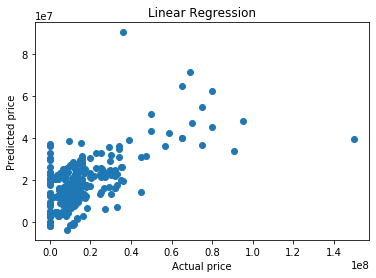

In [558]:
plt.scatter(test_y, y_pred1)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Linear Regression")

Text(0.5, 1.0, 'Xgboost')

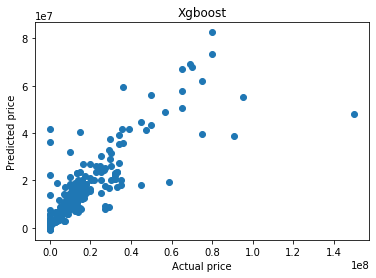

In [559]:
plt.scatter(test_y, y_pred2)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Xgboost")

Text(0.5, 1.0, 'Adaboost')

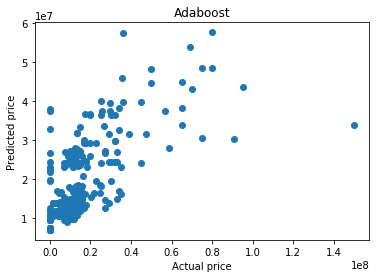

In [560]:
plt.scatter(test_y, y_pred3)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Adaboost")

Text(0.5, 1.0, 'Decision Tree')

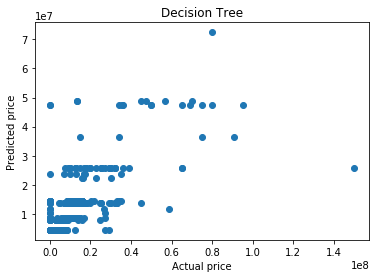

In [561]:
plt.scatter(test_y, y_pred4)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Decision Tree")

Text(0.5, 1.0, 'Random Forest')

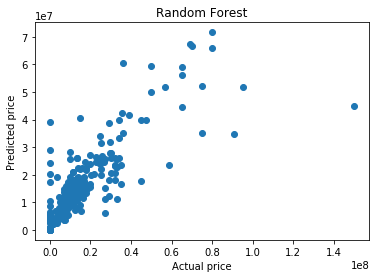

In [562]:
plt.scatter(test_y, y_pred5)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Random Forest")

Text(0.5, 1.0, 'KNN')

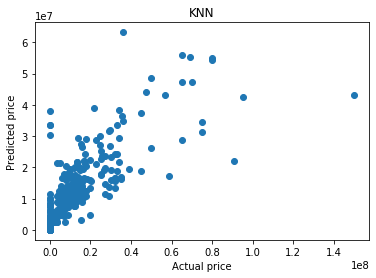

In [563]:
plt.scatter(test_y, y_pred6)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("KNN")

Text(0.5, 1.0, 'SVM')

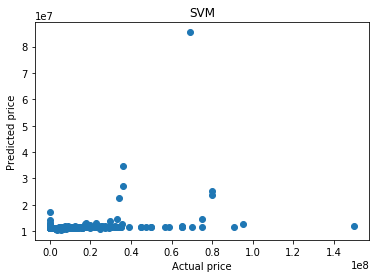

In [564]:
plt.scatter(test_y, y_pred7)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("SVM")

# Looking at the plots of actual vs predicted prices, you can also see that the data points in XGBoost are closer to each other